In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the CSV file with counts
df = pd.read_csv('unique_words_ZH.csv')


# Chinese

## Tone

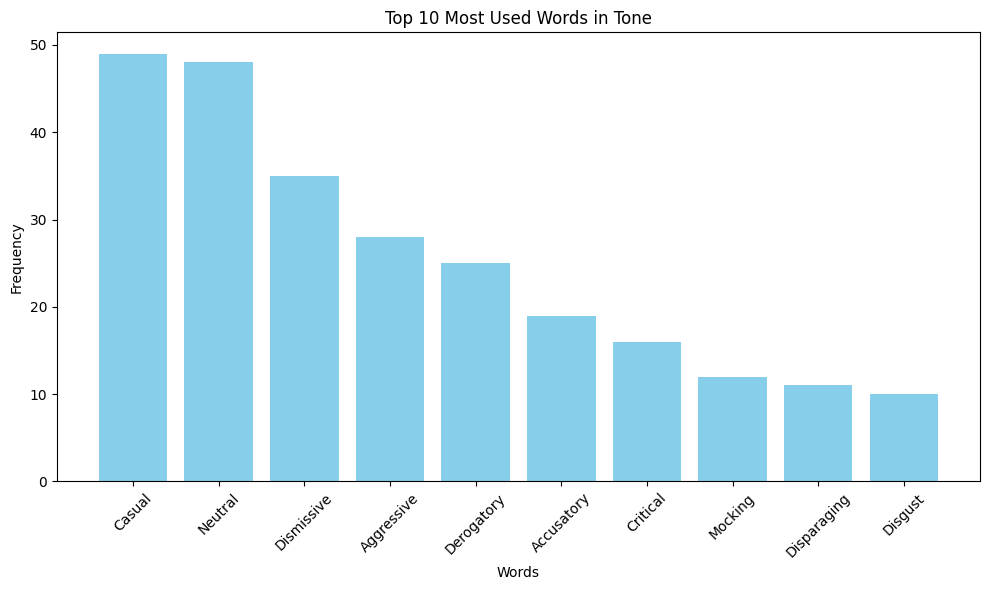

          Tone  Tone appears
0       Casual          49.0
1      Neutral          48.0
2   Dismissive          35.0
3   Aggressive          28.0
4   Derogatory          25.0
5   Accusatory          19.0
6     Critical          16.0
7      Mocking          12.0
8  Disparaging          11.0
9      Disgust          10.0


In [28]:
# Plot histogram for the 'Tone' column
tone_df = df[['Tone', 'Tone appears']].sort_values(by='Tone appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(tone_df['Tone'], tone_df['Tone appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Tone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(tone_df)

## Language

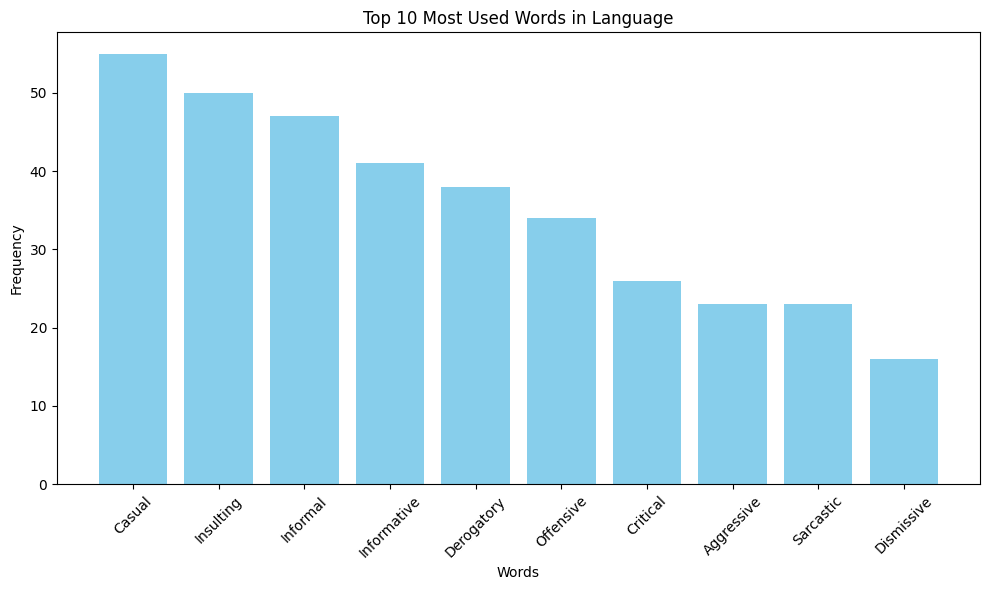

      Language  Language appears
0       Casual              55.0
1    Insulting              50.0
2     Informal              47.0
3  Informative              41.0
4   Derogatory              38.0
5    Offensive              34.0
6     Critical              26.0
7   Aggressive              23.0
8    Sarcastic              23.0
9   Dismissive              16.0


In [29]:
# Plot histogram for the 'Language' column
language_df = df[['Language', 'Language appears']].sort_values(by='Language appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(language_df['Language'], language_df['Language appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Language')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(language_df)

## Sentiment

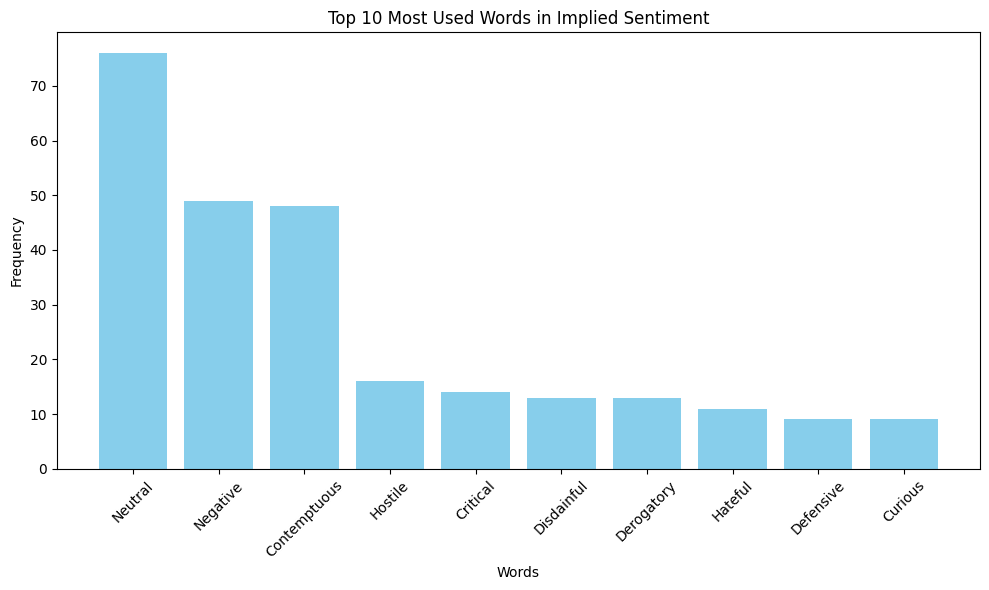

  Implied Sentiment  Implied Sentiment appears
0           Neutral                       76.0
1          Negative                       49.0
2      Contemptuous                       48.0
3           Hostile                       16.0
4          Critical                       14.0
5        Disdainful                       13.0
6        Derogatory                       13.0
7           Hateful                       11.0
8         Defensive                        9.0
9           Curious                        9.0


In [30]:
# Plot histogram for the 'Implied Sentiment' column
implied_sentiment_df = df[['Implied Sentiment', 'Implied Sentiment appears']].sort_values(by='Implied Sentiment appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(implied_sentiment_df['Implied Sentiment'], implied_sentiment_df['Implied Sentiment appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words in Implied Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(implied_sentiment_df)

## All together

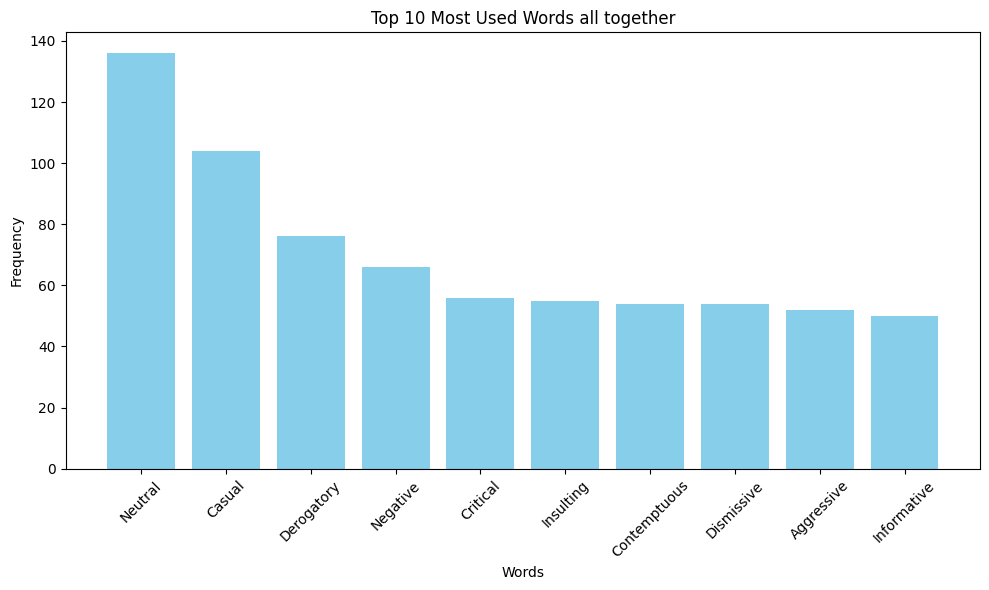

        combine  combine appears
0       Neutral            136.0
1        Casual            104.0
2    Derogatory             76.0
3      Negative             66.0
4      Critical             56.0
5     Insulting             55.0
6  Contemptuous             54.0
7    Dismissive             54.0
8    Aggressive             52.0
9   Informative             50.0


In [31]:
# Plot histogram for the 'Combine' column
combine_df = df[['combine', 'combine appears']].sort_values(by='combine appears', ascending=False).head(10).reset_index(drop=True)
plt.figure(figsize=(10, 6))
plt.bar(combine_df['combine'], combine_df['combine appears'], color='skyblue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words all together')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
print(combine_df)

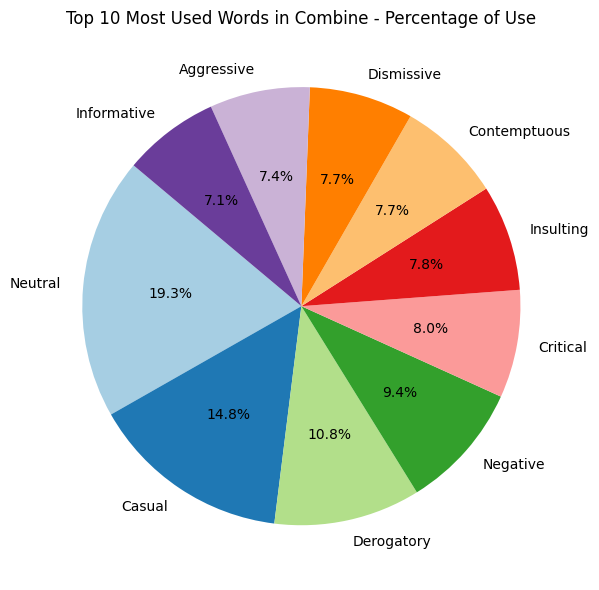

In [32]:
total_sentences = 400

# Get the top 10 most used words from the 'combine' column
combine_df = df[['combine', 'combine appears']].sort_values(by='combine appears', ascending=False).head(10).reset_index(drop=True)

# Calculate the percentage of use for each word
combine_df['percentage'] = (combine_df['combine appears'] / total_sentences) * 100

# Plot the pie chart
plt.figure(figsize=(10, 6))
plt.pie(combine_df['percentage'], labels=combine_df['combine'], autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Most Used Words in Combine - Percentage of Use')
plt.tight_layout()
plt.show()

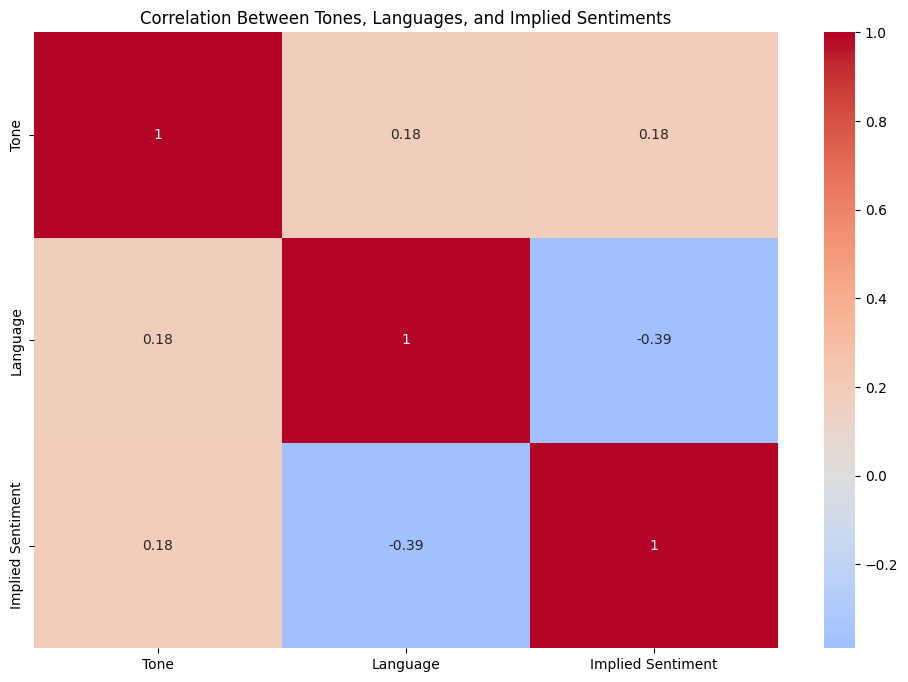

In [33]:
# Combine all data into one DataFrame for correlation analysis
combined_df = pd.DataFrame({
    'Tone': tone_df.set_index('Tone')['Tone appears'],
    'Language': language_df.set_index('Language')['Language appears'],
    'Implied Sentiment': implied_sentiment_df.set_index('Implied Sentiment')['Implied Sentiment appears']
}).fillna(0)

# Calculate the correlation matrix
correlation_matrix = combined_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Between Tones, Languages, and Implied Sentiments')
plt.show()